In [47]:
import pandas as pd
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 9,14
import matplotlib.pyplot as plt

In [6]:
class Reader:
    def __init__(self, file):  
        self.file = file
            
    def read_pkl(self):
        self.df = pd.read_pickle(self.file)
        
    def write_excel(self, ExcelFileName): 
        self.df.to_excel(ExcelFileName)    
        
dff = Reader("./output.pkl")
dff.read_pkl()
dff.df
dff.write_excel('types2.xlsx')

,errcode,data.id,data.pdId,data.developer.devId,data.developer.devShortCleanNm,data.developer.devShortNm,data.developer.devFullCleanNm,data.developer.problObjCnt,data.developer.buildObjCnt,data.developer.comissObjCnt,...,data.developer.bankruptStage.bankruptStageDesc,data.developer.bankruptStage.bankruptLawUrl,data.developer.orgBankruptMsgDttm,data.metro.id,data.metro.name,data.metro.line,data.metro.color,data.metro.time,data.metro.isWalk,data.metro.colors
0,0,13391,28101,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,13397,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,13398,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,13399,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,13383,28105,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10585,0,28071,99284,7344,ЯРКИЙ МИР,ЯРКИЙ МИР,ЯРКИЙ МИР,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10586,0,28074,96537,7344,ЯРКИЙ МИР,ЯРКИЙ МИР,ЯРКИЙ МИР,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10587,0,28072,96379,7344,ЯРКИЙ МИР,ЯРКИЙ МИР,ЯРКИЙ МИР,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10588,0,44447,475093,2538,ЯРОСЛАВЛЬЗАКАЗЧИК,ЯРОСЛАВЛЬЗАКАЗЧИК,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ЯРОСЛАВЛЬЗАКАЗЧИК,0,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


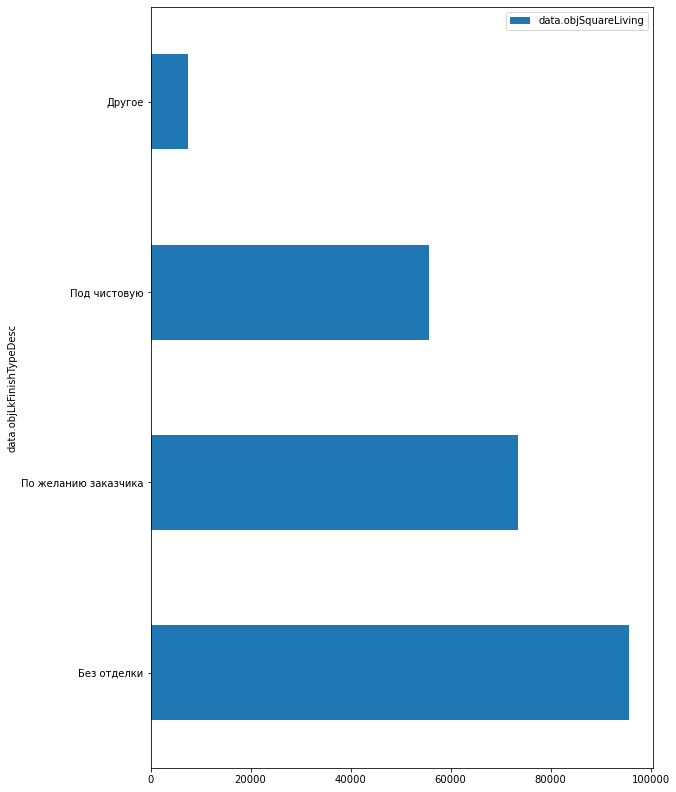

In [51]:
class Graphicer:
    def __init__(self, df):
        self.df = df
     
    def regionmap_price(self):
        self.df = self.df.dropna(subset=['data.objPriceAvg'])
        self.hists = self.df['data.objPriceAvg'].hist(by=self.df['data.developer.regRegionDesc'], figsize=(25, 70), color = "tab:blue", grid = True);
    
    def cost_livespace(self):
        self.df = self.df.dropna(subset=['data.objPriceAvg'])
        sns.pairplot(vars=["data.objPriceAvg", "data.objSquareLiving"], data=self.df, hue="data.developer.regRegionDesc", height=5);
        
    def region_pricemean(self):
        self.df = self.df.dropna(subset=['data.objPriceAvg'])
        self.df = self.df.groupby('data.developer.regRegionDesc')[['data.objPriceAvg']].mean()
        self.df.sort_values(by=['data.objPriceAvg'], ascending=False).plot(kind='barh');
        
    def construction_volume(self):
        self.df = self.df.groupby('data.developer.regRegionDesc')[['data.objSquareLiving']].sum()
        self.df.sort_values(by=['data.objSquareLiving'], ascending=False).plot(kind='barh');
     
    def volumeconstruct_year(self):
        self.df['data.objReady100PercDt'] = self.df['data.objReady100PercDt'].str[:4]
        self.df = self.df.groupby('data.objReady100PercDt')[['data.objSquareLiving']].sum()
        self.df.sort_values(by=['data.objSquareLiving'], ascending=False).plot(kind='barh');
        
    def floor_mean(self):
        self.df = self.df.groupby('data.developer.regRegionDesc')[['data.floorMax']].mean()
        self.df.sort_values(by=['data.floorMax'], ascending=False).plot(kind='barh');
        
    def mean_livespace(self):
        self.df = self.df.groupby('data.developer.regRegionDesc')[['data.objSquareLiving']].mean()
        self.df.sort_values(by=['data.objSquareLiving'], ascending=False).plot(kind='barh');
        
    def parking_area(self):    
        self.df = self.df.groupby('data.developer.regRegionDesc')[['data.objElemParkingCnt']].mean()
        self.df.sort_values(by=['data.objElemParkingCnt'], ascending=False).plot(kind='barh');
        
    def hmao_builders(self):
        self.df = self.df.loc[self.df['data.developer.regRegionDesc'] == 'Ханты-Мансийский АО - Югра']
        self.df = self.df.groupby('data.developer.devFullCleanNm')[['data.objSquareLiving']].sum()
        self.df.sort_values(by=['data.objSquareLiving'], ascending=False).plot(kind='barh');
        
    def hmao_materials(self):    
        self.df = self.df.loc[self.df['data.developer.regRegionDesc'] == 'Ханты-Мансийский АО - Югра']
        self.df = self.df.groupby('data.wallMaterialShortDesc')[['data.objSquareLiving']].sum()
        self.df.sort_values(by=['data.objSquareLiving'], ascending=False).plot(kind='barh');
        
    def hmao_remonts(self):    
        self.df = self.df.loc[self.df['data.developer.regRegionDesc'] == 'Ханты-Мансийский АО - Югра']
        self.df = self.df.groupby('data.objLkFinishTypeDesc')[['data.objSquareLiving']].sum()
        self.df.sort_values(by=['data.objSquareLiving'], ascending=False).plot(kind='barh');
        
        
dff2 = Graphicer(dff.df)
dff2.hmao_remonts()
